In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics

import datetime
%matplotlib inline

In [16]:
houses = pd.read_csv("data/King_County_House_prices_dataset.csv")

houses.head()
houses.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [3]:
houses.dropna(how='any', subset=['view', 'waterfront'], inplace=True)

In [4]:
houses.eval("price_per_sqft = price / sqft_living", inplace=True)
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,209.338521
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,233.766234
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,308.163265
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,303.571429
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,226.937269


In [164]:
#renovated = []
#for value in houses.yr_renovated.values:
#    if value > 0:
#        renovated.append(1)
#    else:
#        renovated.append(0)
#
#houses["renovated"] = renovated

In [6]:
X_dum=houses.copy()
columns_to_drop = ["id", "date", "zipcode", "price_per_sqft"]             
for col in columns_to_drop:
    X_dum.drop(col, axis=1, inplace=True)

X_dum.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

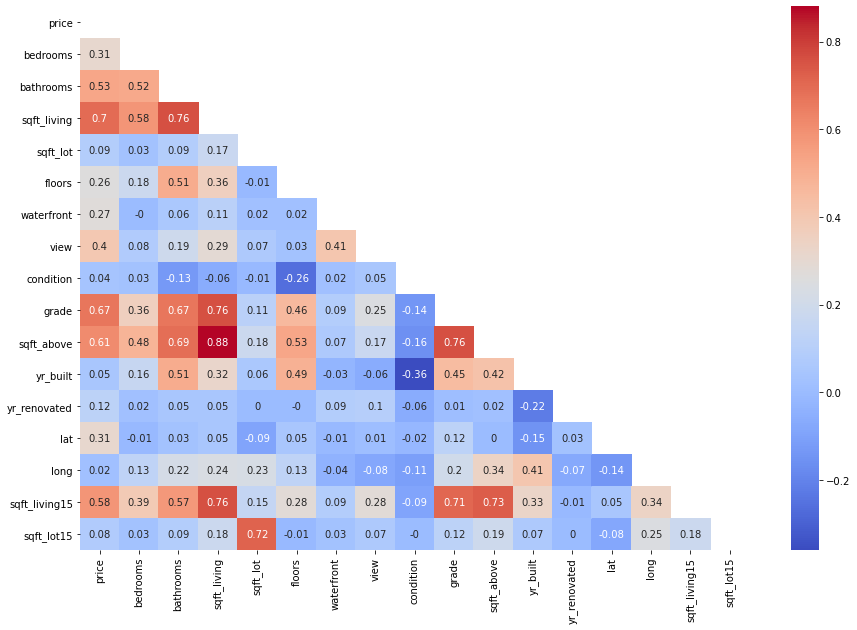

In [7]:
mask = np.triu(X_dum.corr())

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(round(X_dum.corr(),2)
                 ,annot=True
                 ,mask=mask
                 ,cmap='coolwarm')

In [8]:
#variables = ["sqft_living", "bathrooms", "bedrooms", "grade", "sqft_above", "sqft_living15", "view"]

variables = ["sqft_living", "grade", "yr_built", "view"]

In [9]:
train, test = train_test_split(houses, train_size = 0.8)
model = linear_model.LinearRegression()
model.fit(train[variables], train["price"])

LinearRegression()

In [10]:
print(model.score(train[variables], train['price']),
    model.score(test[variables], test['price']))

0.6284259944417655 0.6153507830402555


In [11]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [12]:
predicted_values = model.predict(test[variables])
mape(test["price"], predicted_values)

0.31133309692909894

In [13]:
import statsmodels.formula.api as smf

In [14]:
model = 'price ~ sqft_living + grade + view + yr_built'
result = smf.ols(formula=model, data=houses).fit()

In [15]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     8027.
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        11:10:56   Log-Likelihood:            -2.6351e+05
No. Observations:               19164   AIC:                         5.270e+05
Df Residuals:                   19159   BIC:                         5.271e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.626e+06    1.2e+05     46.929      0.000    5.39e+06    5.86e+06
sqft_living   167.3453      2.786     60.076      0.000     161.885     172.805
grade        1.349e+05   2303.702     58.562      0.000     1.3e+05    1.39e+05
view         7.571e+04   2283.197     33.160      0.000    7.12e+04    8.02e+04
yr_built    -3289.4981     63.485    -51.816      0.000   -3413.933   -3165.063
==============================================================================
Omnibus:                    15348.378   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1205819.902
Skew:                           3.308   Prob(JB):                         0.00
Kurtosis:                      41.293   Cond. No.                     2.16e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
with open("columns.txt", "w") as f:
    for col in houses.columns:
        f.write(col + "\n")
        
